### 1. Import libraries

In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier, plot_tree




import warnings
warnings.filterwarnings('ignore')

### Problem Statement

#### You have been provided with a dataset containing various features, including numerical and categorical data,with the aim of building a classification model. The goal is to predict a target class based on the provided features.The dataset might include outliers, highly correlated features, and other preprocessing challenges.

### Data Gathering

In [21]:
df=pd.read_csv('Train_data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [276]:
df.duplicated().sum()

0

In [277]:
df.shape

(25192, 42)

In [278]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [280]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [281]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


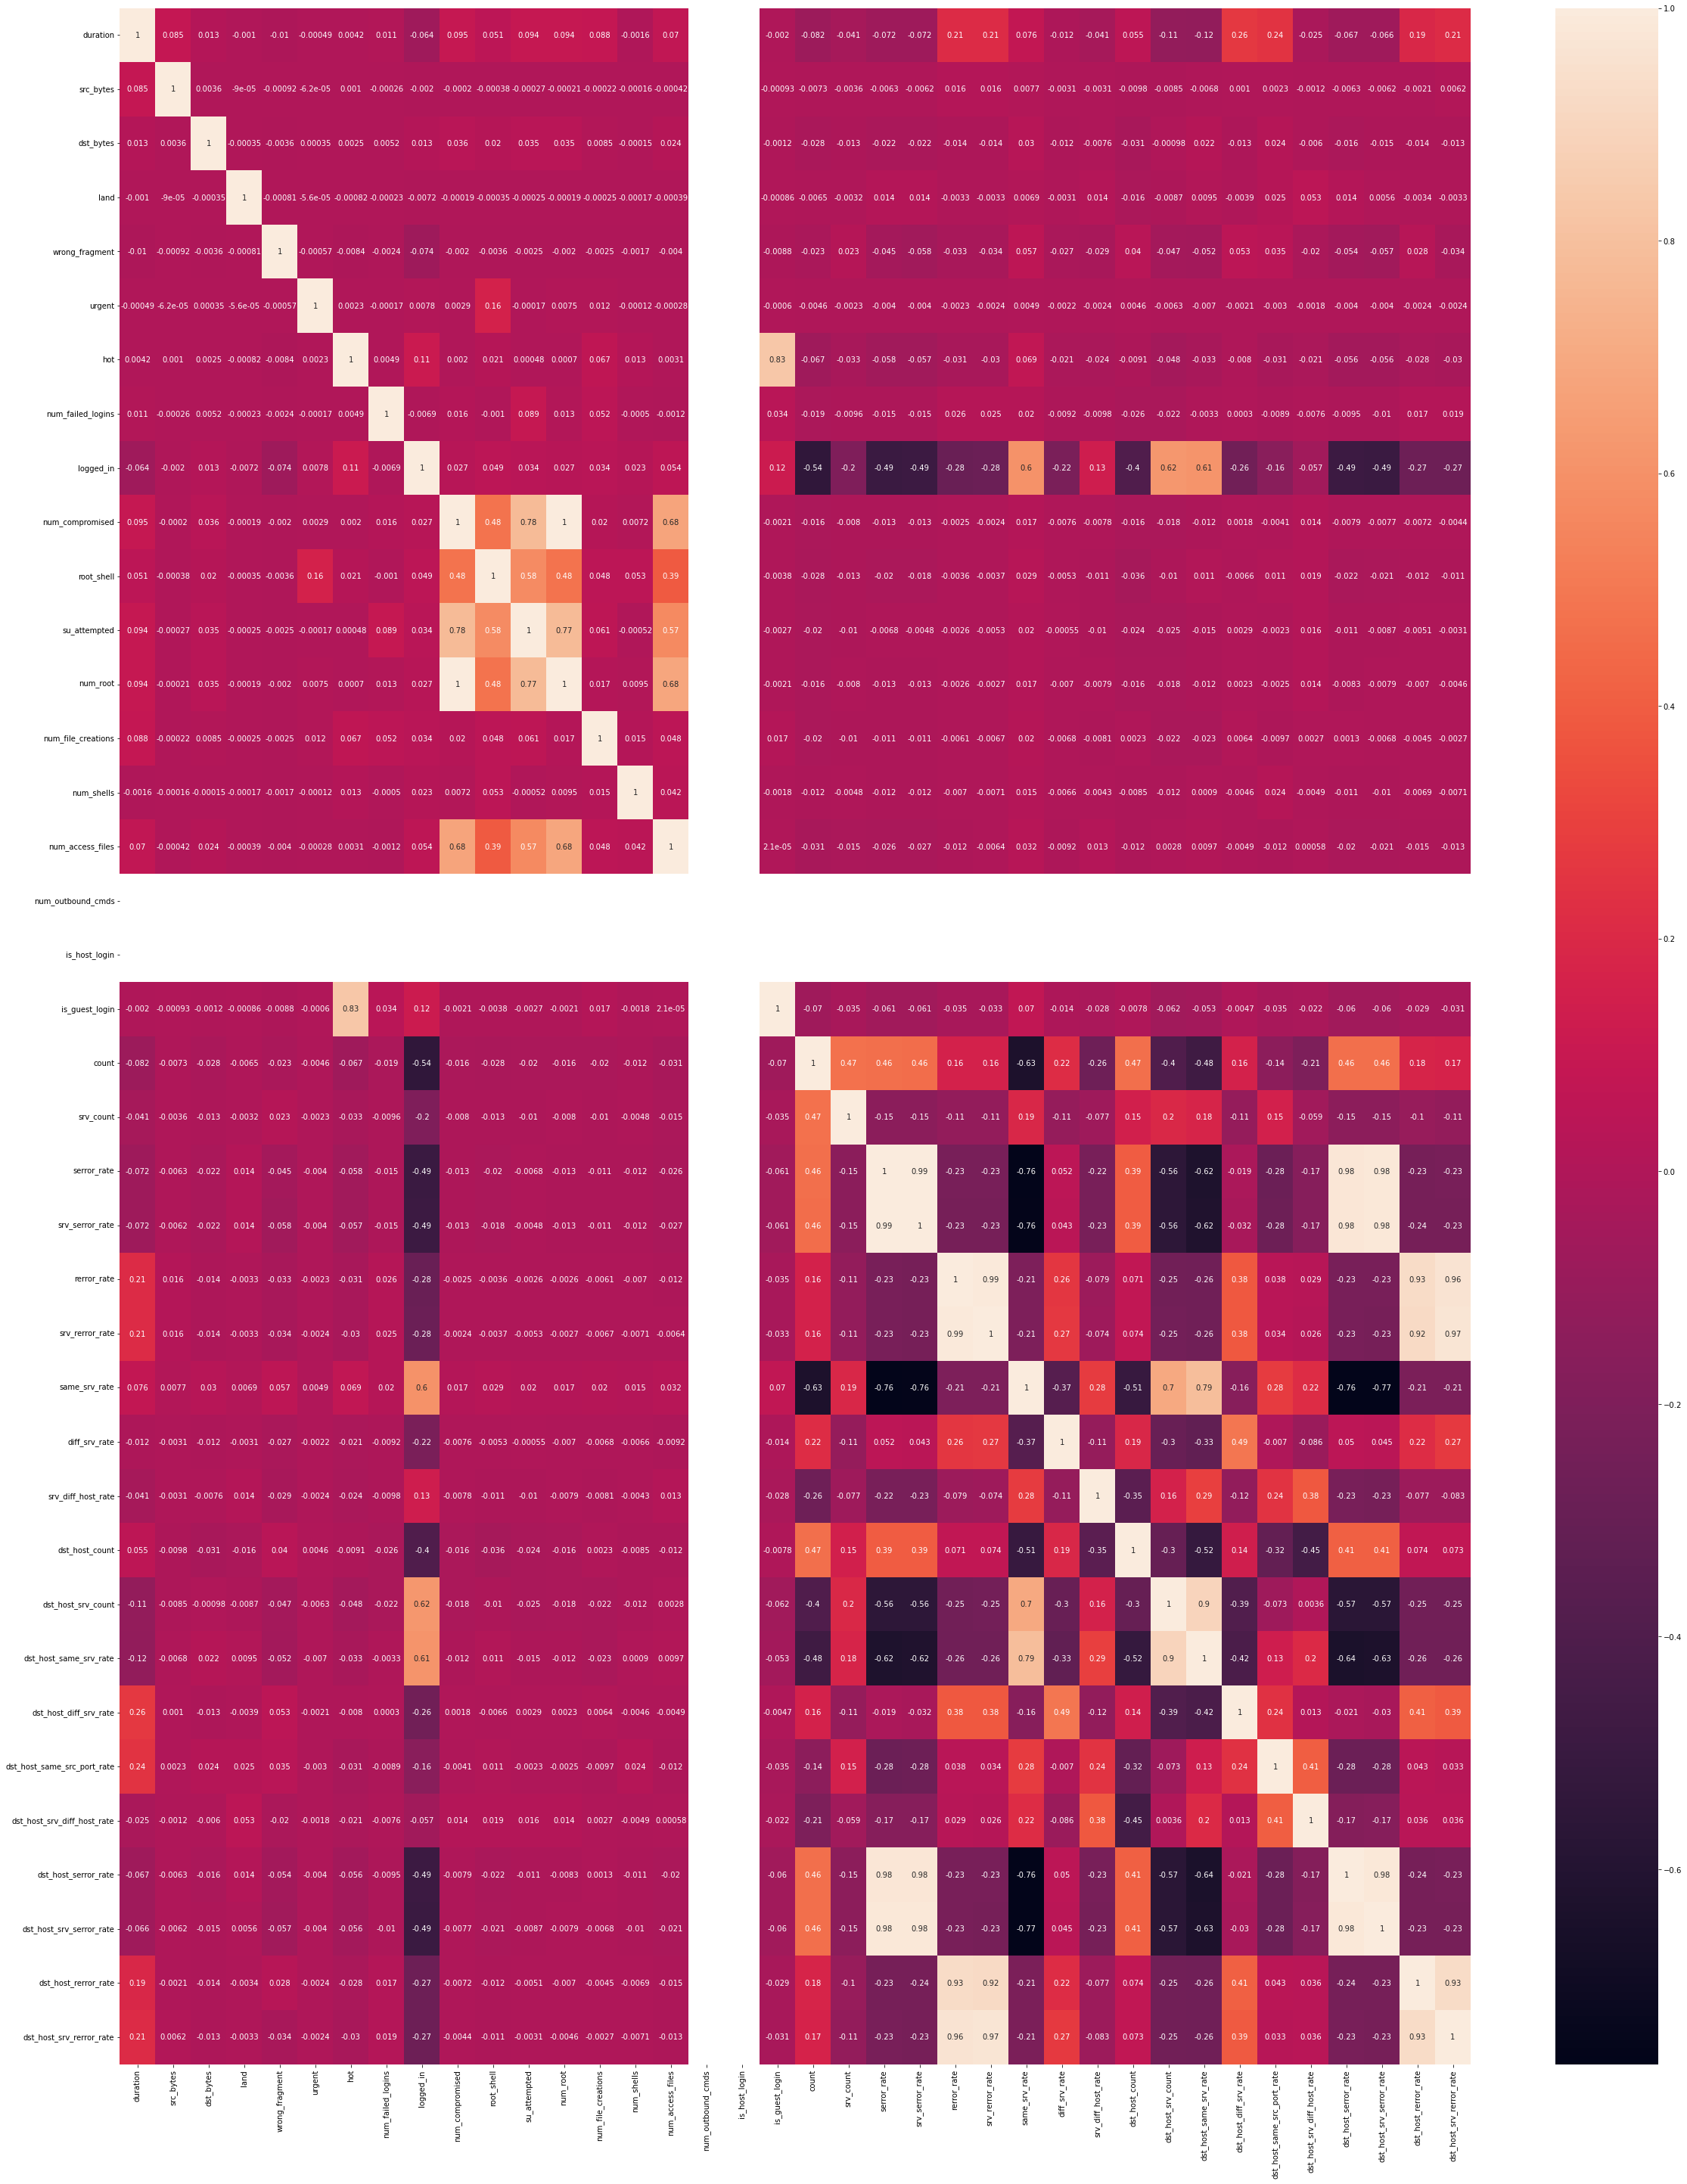

In [282]:
plt.figure(figsize=(40,50))
sns.heatmap(df.corr(),annot= True)
plt.savefig('Correlation_Matrix.jpg')

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()
def lab(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])

lab(df)

## Exploratory Data Analysis(EDA)

### 1.Duration

In [283]:
df['duration'].unique()

array([    0,  5607,   507,     1,     2,  9052,   315,  1082, 25950,
         240,    26,  9015,     7, 15159,     4,    20,    18,  9235,
         409, 36613,  5043, 31401,  7805,    10,  5784,   542,    30,
       10455, 10326,    28,   202, 41285, 13488,    25,  3047,  1327,
         860,   475,     8,    27,  5065,  1985,     5,  5753, 17399,
          31, 21263,     3,  4931,  9908,   357,  1051,   799, 35682,
       15435,  2414,     6,  8486, 37815,  9114,    59, 41802,  4468,
       40703,    29,  8625,  8556, 37874,  5410,   252,  1096, 41111,
        2969,   687,    36,    24,    22,  5080,  9431, 37749,  1714,
       39667,    19, 25641,   171, 38776,  2035, 37688,   318,    32,
         915,  6214,  8257,  2670,  3660,   407,   730,  7701,     9,
       22861, 27018, 12278, 31461,  2910, 10656,    17, 21123,    11,
        2511,    42,   945,  2532,    23,  7631,   718,   610,    35,
       29053,  6707,   804,    98, 12705,  3995, 37912,  2629, 13678,
        1530,  1125,

In [284]:
df['duration'].nunique()

758

In [285]:
df['duration'].value_counts()

0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: duration, Length: 758, dtype: int64

In [286]:
df['duration'].describe()

count    25192.000000
mean       305.054104
std       2686.555640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      42862.000000
Name: duration, dtype: float64

<AxesSubplot:>

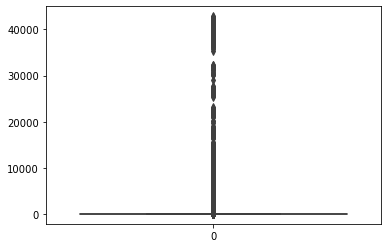

In [287]:
sns.boxplot(data=df['duration'])

In [288]:
q1=df['duration'].quantile(0.25)
q2=df['duration'].quantile(0.50)
q3=df['duration'].quantile(0.75)

iqr=q3-q1

Upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(Upper_limit)
print(lower_limit)

0.0
0.0


### 2.Protocol_type

In [289]:
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [30]:
df['protocol_type'].nunique()

3

In [31]:
df['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [32]:
df['protocol_type'].replace({'tcp':1,'udp':2,'icmp':3},inplace=True)

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

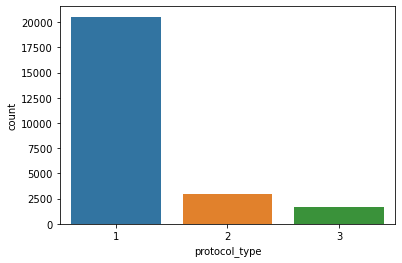

In [33]:
sns.countplot(x=df['protocol_type'])

<AxesSubplot:ylabel='protocol_type'>

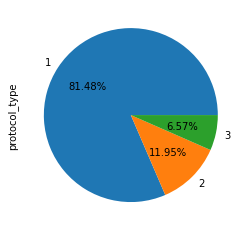

In [34]:
df['protocol_type'].value_counts().plot(kind='pie',autopct="%0.2f%%")

### 3. service

In [321]:
unique_services = df['service'].unique()
print(unique_services)


['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']


In [322]:
df['service'] = pd.to_numeric(df['service'], errors='coerce')


In [323]:
df['service'].fillna(-1, inplace=True)  # Replace NaN with -1 or any other default value
df['service'] = df['service'].astype(int)  # Convert to integers


In [324]:
df['service'].replace({'other': 0, 'http': 1, 'smtp': 2}, inplace=True)
df['service'] = df['service'].astype(int)


In [325]:
df['service'] = df['service'].astype('category').cat.codes


In [326]:
# Replace non-numeric values with NaN and then with a default value
df['service'] = pd.to_numeric(df['service'], errors='coerce')
df['service'].fillna(-1, inplace=True)  # Replace NaN with -1 or any other default value

# Convert to integers
df['service'] = df['service'].astype(int)


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int32  
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### Flag

In [328]:
unique_flags = df['flag'].unique()
print(unique_flags)


['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [334]:
df['flag'].replace({'SF': 0, 'S0': 1, 'REJ': 2, 'RSTO': 3, 'RSTR': 4, 'OTH': 5, 'S1': 6, 'S2': 7, 'S3': 8}, inplace=True)
df['flag'] = df['flag'].astype(int)


In [335]:
df['flag'] = df['flag'].astype('category').cat.codes


In [336]:
df['flag'] = df['flag'].astype(int)


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int32  
 3   flag                         25192 non-null  int32  
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### 5. src_bytes

In [295]:
df['src_bytes'].unique()

array([ 491,  146,    0, ..., 1466, 2499, 2896], dtype=int64)

In [296]:
df['src_bytes'].nunique()

1665

In [297]:
df['src_bytes'].value_counts()

0        9866
8         738
1         480
44        467
45        416
         ... 
3724        1
44788       1
1205        1
827         1
2896        1
Name: src_bytes, Length: 1665, dtype: int64

<AxesSubplot:>

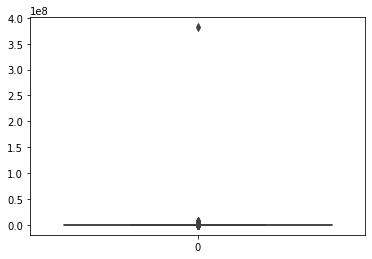

In [298]:
sns.boxplot(data=df['src_bytes'])

In [299]:
df['src_bytes'].describe()

count    2.519200e+04
mean     2.433063e+04
std      2.410805e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.790000e+02
max      3.817091e+08
Name: src_bytes, dtype: float64

In [300]:
q1=df['src_bytes'].quantile(0.25)
q2=df['src_bytes'].quantile(0.50)
q3=df['src_bytes'].quantile(0.75)

iqr=q3-q1
print(iqr)
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

279.0
697.5
-418.5


In [301]:
df['src_bytes']=np.where(df['src_bytes']<lower_limit,lower_limit,df['src_bytes'])

In [302]:
df['src_bytes']=np.where(df['src_bytes']>upper_limit,upper_limit,df['src_bytes'])

<AxesSubplot:>

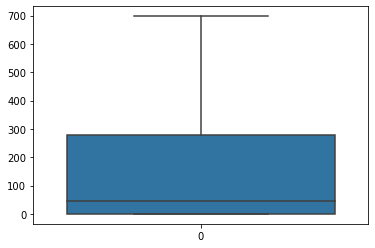

In [303]:
sns.boxplot(data=df['src_bytes'])

### 6. dst_bytes

In [304]:
df['dst_bytes'].unique()

array([   0, 8153,  420, ..., 6160,   99, 2257], dtype=int64)

In [305]:
df['dst_bytes'].nunique()

3922

In [306]:
df['dst_bytes'].describe()

count    2.519200e+04
mean     3.491847e+03
std      8.883072e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.302500e+02
max      5.151385e+06
Name: dst_bytes, dtype: float64

In [307]:
df['dst_bytes'].skew()

54.777576214208075

<AxesSubplot:xlabel='dst_bytes', ylabel='Density'>

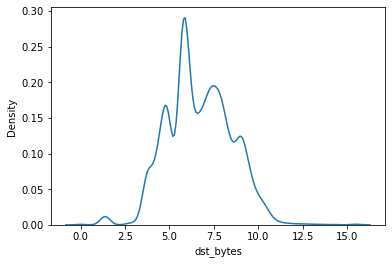

In [390]:
sns.kdeplot(np.log(df['dst_bytes']))

In [309]:
q1=df['dst_bytes'].quantile(0.25)
q2=df['dst_bytes'].quantile(0.50)
q3=df['dst_bytes'].quantile(0.75)

iqr=q3-q1
print(iqr)
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

530.25
1325.625
-795.375


In [310]:
df['dst_bytes']=np.where(df['dst_bytes']>=upper_limit,upper_limit,df['src_bytes'])

<AxesSubplot:xlabel='dst_bytes', ylabel='Density'>

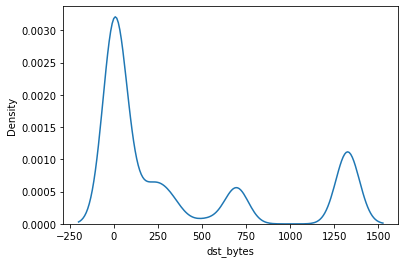

In [311]:
sns.kdeplot(df['dst_bytes'])

<AxesSubplot:>

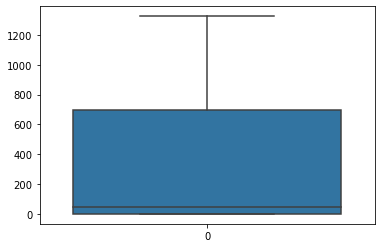

In [312]:
sns.boxplot(data=df['dst_bytes'])

### 7.Land

In [313]:
df['land'].unique()

array([0, 1], dtype=int64)

In [314]:
df['land'].nunique()

2

In [315]:
df['land'].value_counts()

0    25190
1        2
Name: land, dtype: int64

<AxesSubplot:>

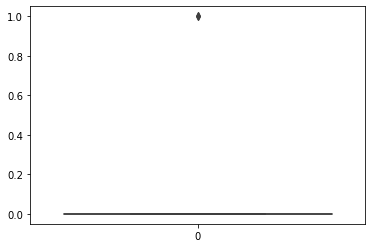

In [316]:
sns.boxplot(data=df['land'])

### 8.Wrong frament

In [317]:
df['wrong_fragment'].value_counts()

0    24968
3      187
1       37
Name: wrong_fragment, dtype: int64

In [318]:
q1=df['wrong_fragment'].quantile(0.25)
q2=df['wrong_fragment'].quantile(0.50)
q3=df['wrong_fragment'].quantile(0.75)

iqr=q3-q1
print(iqr)
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0
0.0


### 9. Urgent

In [319]:
df['urgent'].unique()

array([0, 1], dtype=int64)

In [320]:
df['urgent'].nunique()

2

In [230]:
df.drop(['urgent'], axis=1, inplace=True)

### 10.Hot

In [231]:
df['hot'].unique()

array([ 0,  5,  6,  4,  2,  1, 28, 30, 22, 24, 14,  3, 15, 25, 19, 18, 77,
       17, 11,  7, 20, 12], dtype=int64)

In [232]:
df['hot'].nunique()

22

In [233]:
df['hot'].value_counts()

0     24672
2       200
1        78
30       55
28       52
4        37
6        26
5        17
22       13
24        9
19        8
3         7
18        6
14        3
7         2
15        1
25        1
77        1
17        1
11        1
20        1
12        1
Name: hot, dtype: int64

<AxesSubplot:>

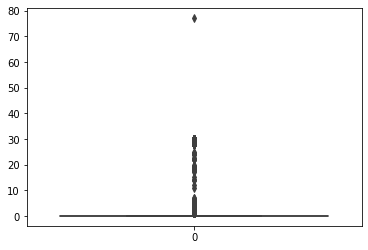

In [234]:
sns.boxplot(data=df['hot'])

In [235]:
q1=df['hot'].quantile(0.25)
q2=df['hot'].quantile(0.50)
q3=df['hot'].quantile(0.75)

iqr=q3-q1
print(iqr)
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0
0.0


### num_failed_logins

In [236]:
 df['wrong_fragment'].unique()

array([0, 3, 1], dtype=int64)

In [237]:
df['wrong_fragment'].nunique()

3

In [238]:
df['wrong_fragment'].value_counts()

0    24968
3      187
1       37
Name: wrong_fragment, dtype: int64

<AxesSubplot:>

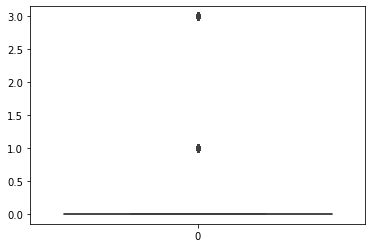

In [239]:
sns.boxplot(data=df['wrong_fragment'])

<AxesSubplot:xlabel='wrong_fragment', ylabel='Count'>

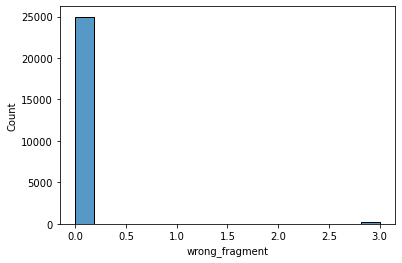

In [240]:
sns.histplot(data=df['wrong_fragment'])

<AxesSubplot:xlabel='wrong_fragment', ylabel='Density'>

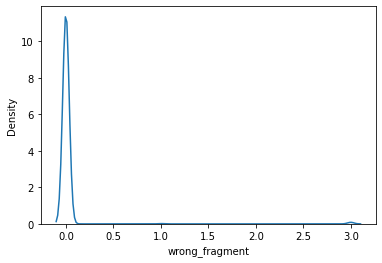

In [241]:
sns.kdeplot(data=df['wrong_fragment'])

### logged_in 

In [242]:
 df['logged_in'].unique()

array([0, 1], dtype=int64)

In [243]:
df['logged_in'].nunique()

2

In [244]:
df['logged_in'].value_counts()

0    15247
1     9945
Name: logged_in, dtype: int64

<AxesSubplot:>

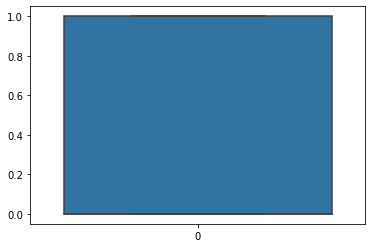

In [245]:
sns.boxplot(data=df['logged_in'])

### num_compromised

In [246]:
 df['num_compromised'].unique()

array([  0,   3,   2,   1,  19,   5,   4,  38, 107, 462, 110,   6, 151,
         7,  31,   9, 157,  13, 558,  12, 371, 217,  83, 193, 789, 520,
       884, 457], dtype=int64)

In [247]:
 df['num_compromised'].nunique()

28

In [248]:
 df['num_compromised'].value_counts()

0      24920
1        194
2         21
4         13
6          8
3          7
5          5
7          2
151        2
12         2
83         1
558        1
789        1
520        1
884        1
217        1
371        1
193        1
31         1
13         1
157        1
9          1
110        1
462        1
107        1
38         1
19         1
457        1
Name: num_compromised, dtype: int64

In [249]:
df.drop(['num_compromised'], axis=1, inplace=True)

### root_shell      

In [250]:
 df['root_shell'].unique()

array([0, 1], dtype=int64)

In [251]:
df['root_shell'].nunique()

2

### class

In [97]:
clf_class = df['class'].unique()
print(clf_class)

[0 1]


In [92]:
df['class'].replace({'normal': 0, 'anomaly': 1}, inplace=True)
df['class'] = df['class'].astype(int)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int32  
 3   flag                         25192 non-null  int32  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

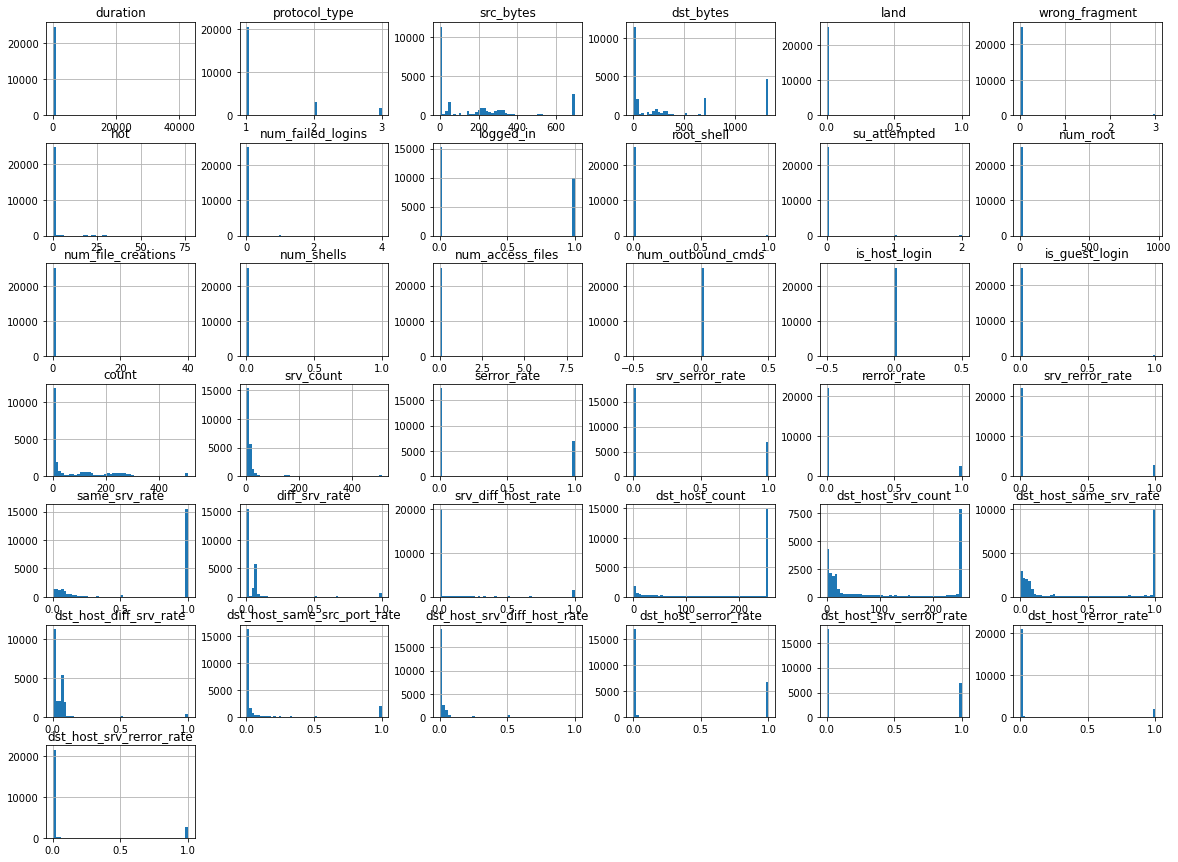

In [252]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [253]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])


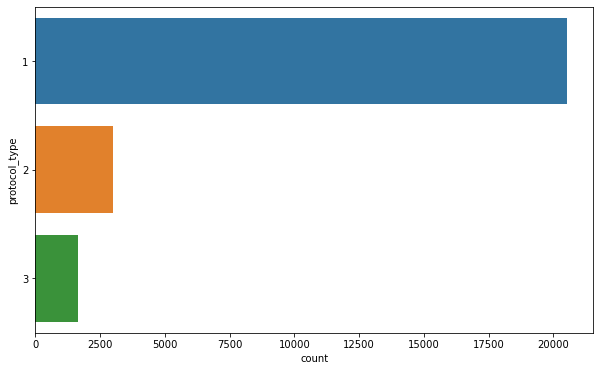

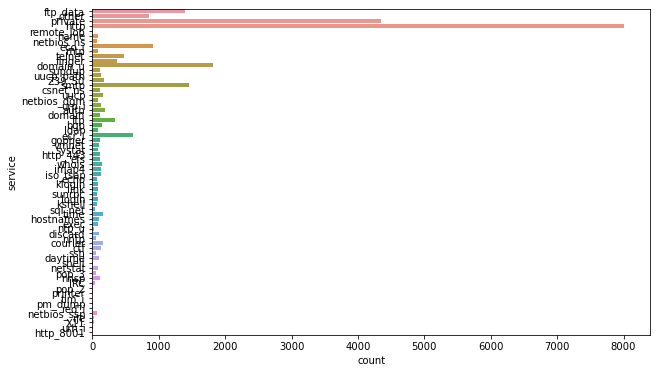

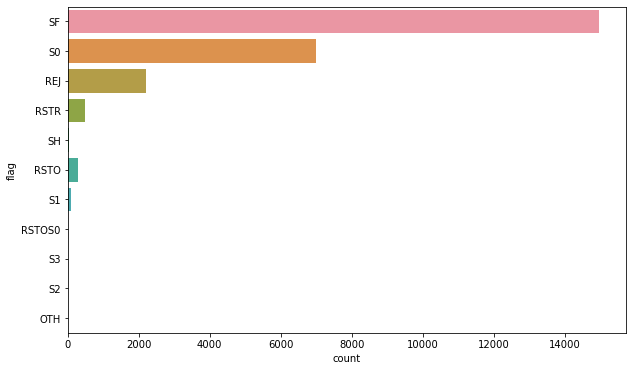

In [254]:
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df)
    plt.show()

In [255]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [256]:
print(df['service'].head())


0    ftp_data
1       other
2     private
3        http
4        http
Name: service, dtype: object


In [257]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,SF,491.0,491.000,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,SF,146.0,146.000,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,S0,0.0,0.000,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,http,SF,232.0,1325.625,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,SF,199.0,199.000,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,exec,RSTO,0.0,0.000,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,1,ftp_data,SF,334.0,334.000,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,1,private,REJ,0.0,0.000,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,1,nnsp,S0,0.0,0.000,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


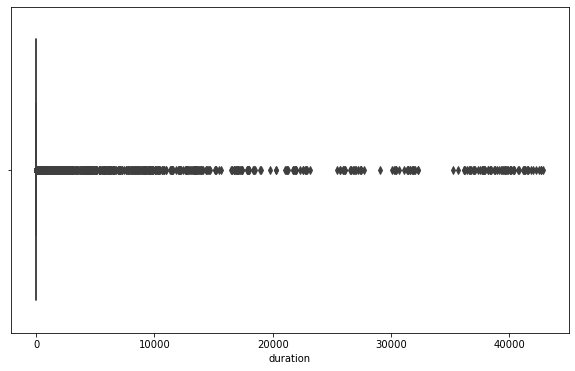

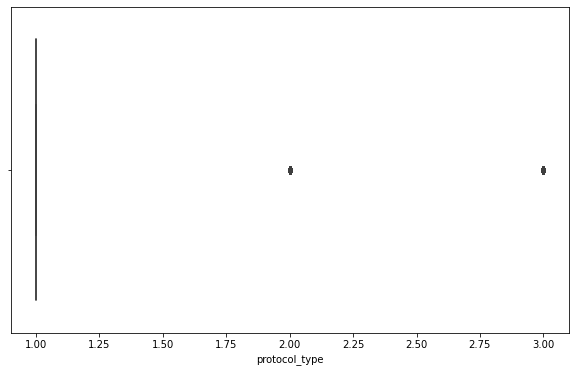

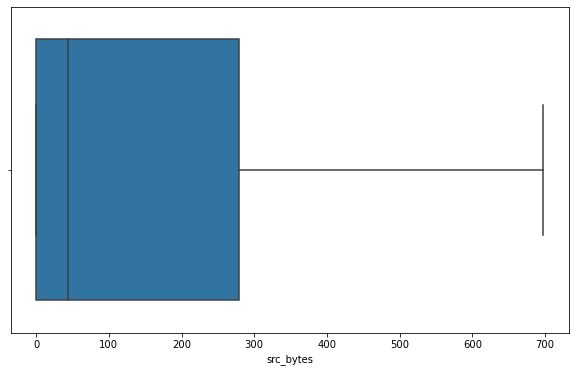

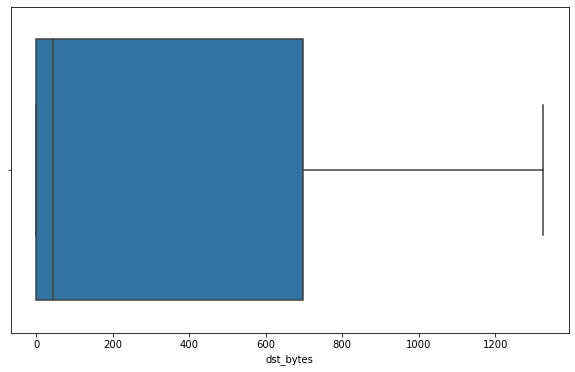

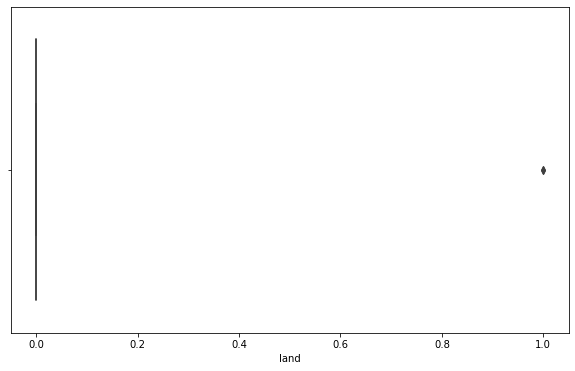

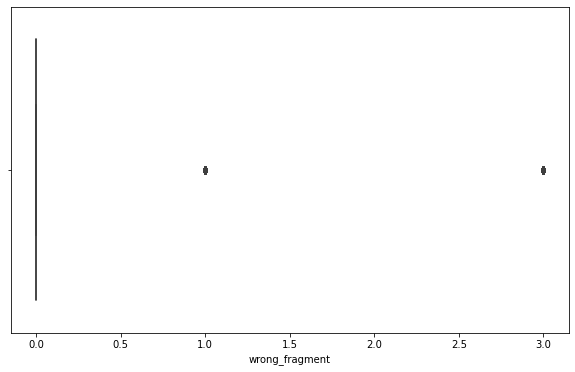

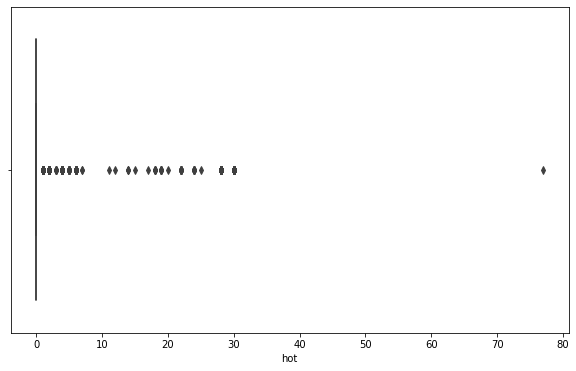

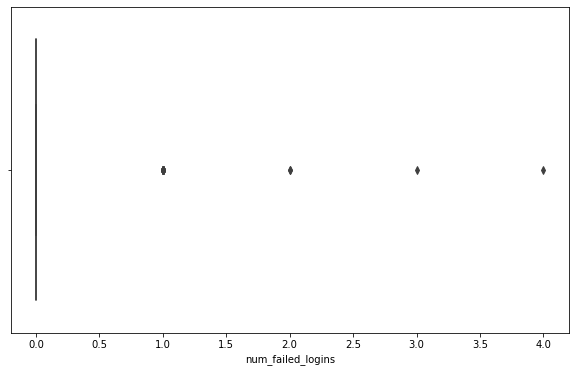

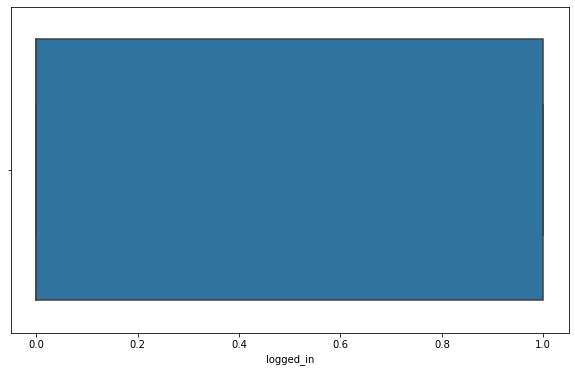

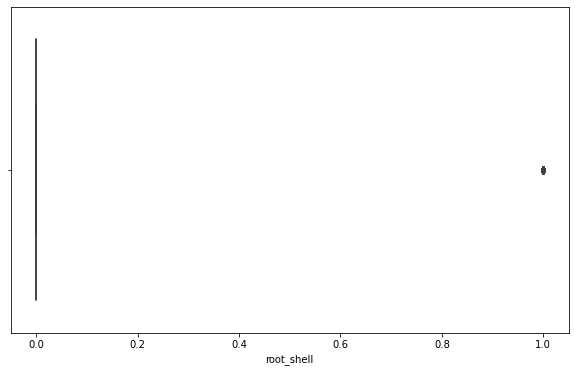

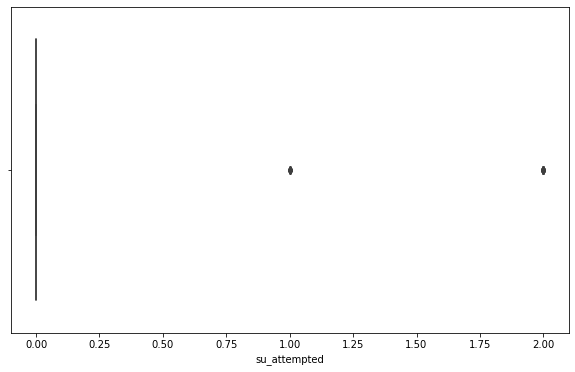

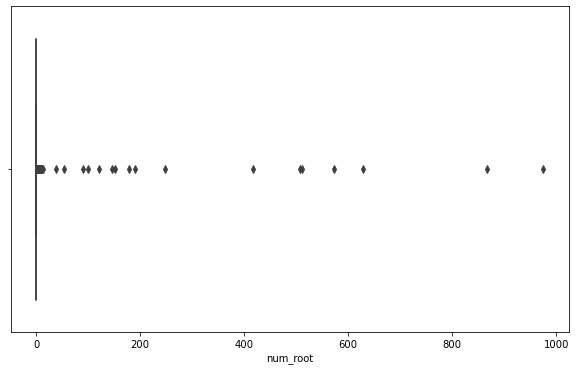

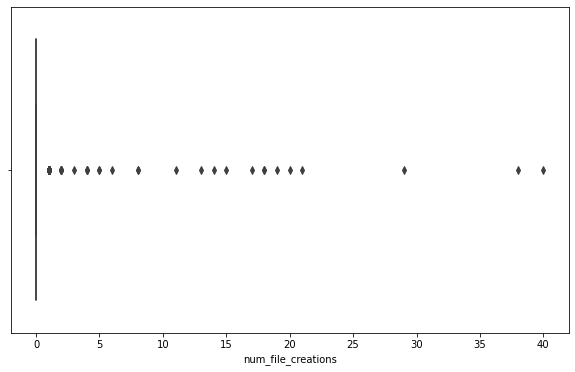

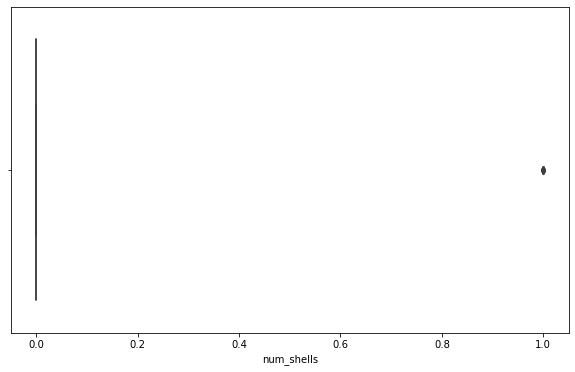

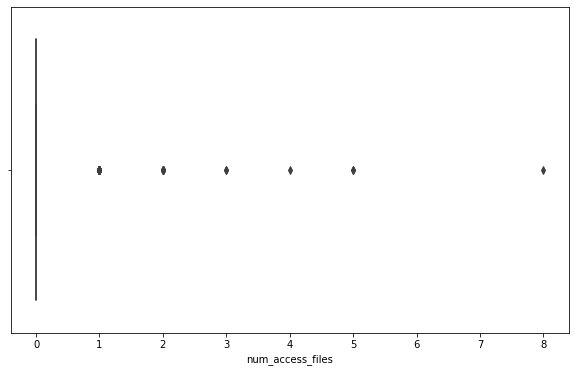

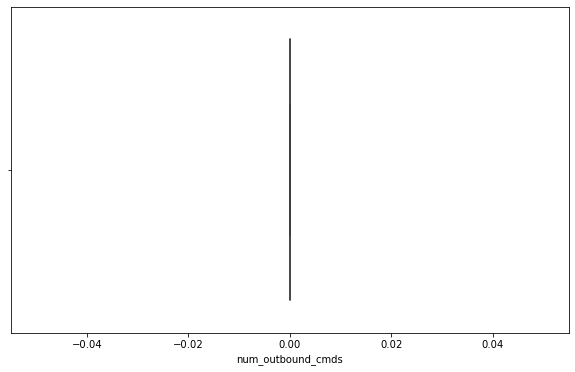

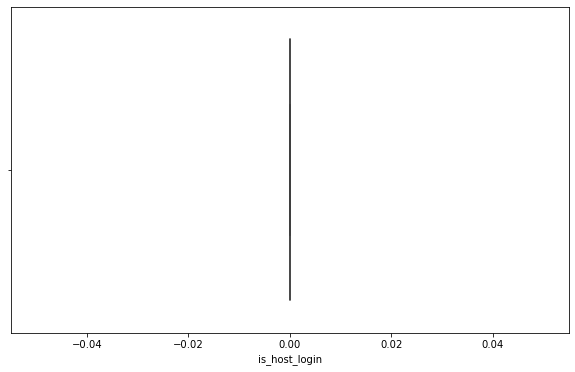

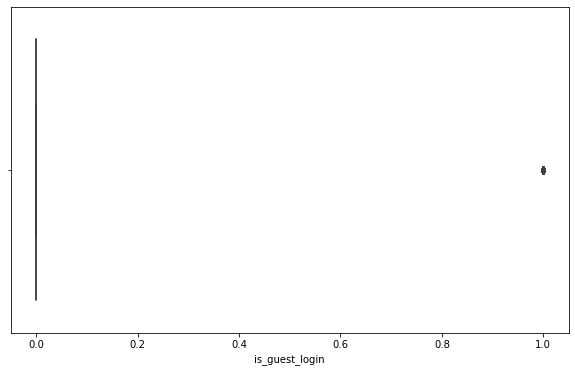

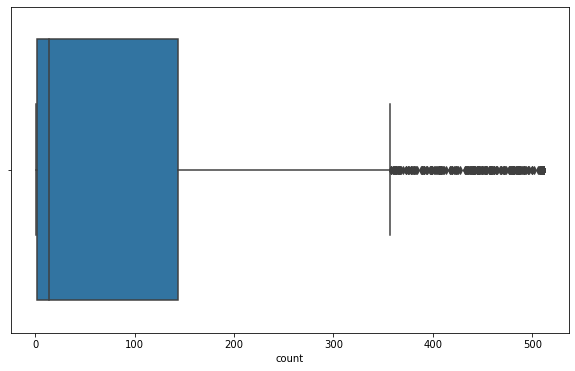

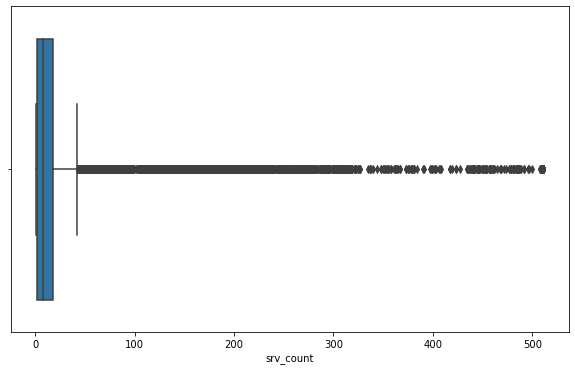

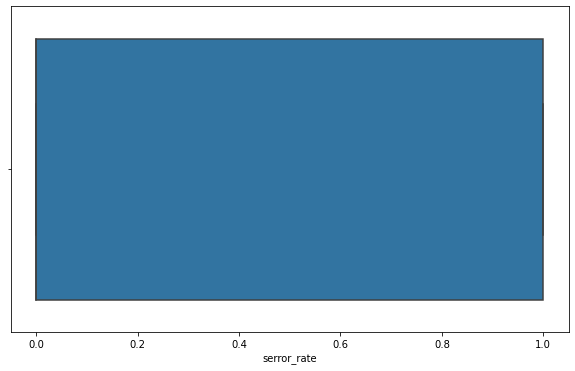

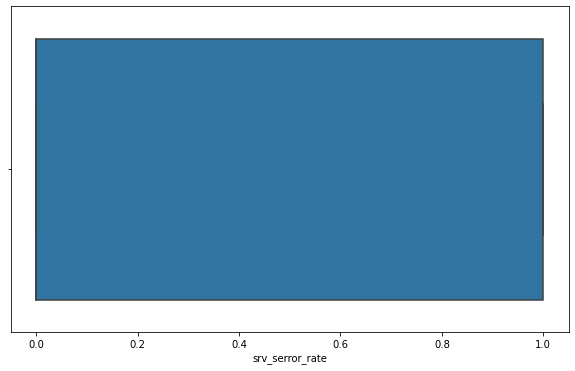

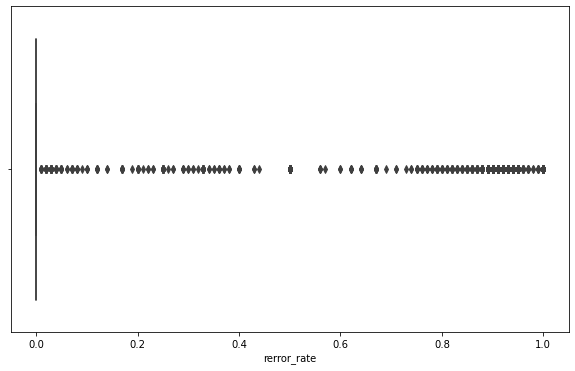

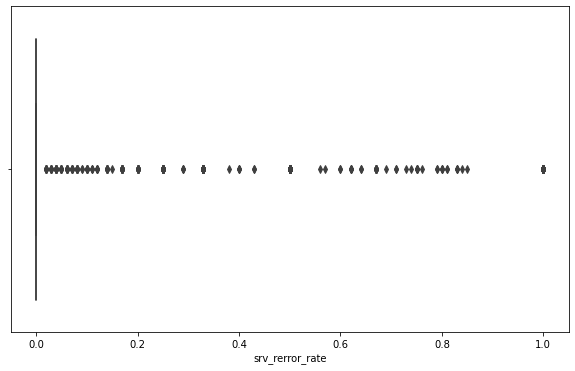

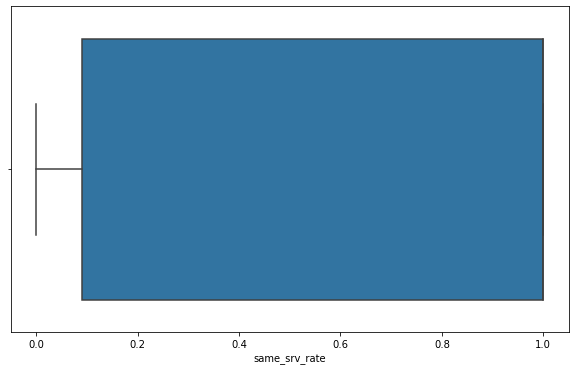

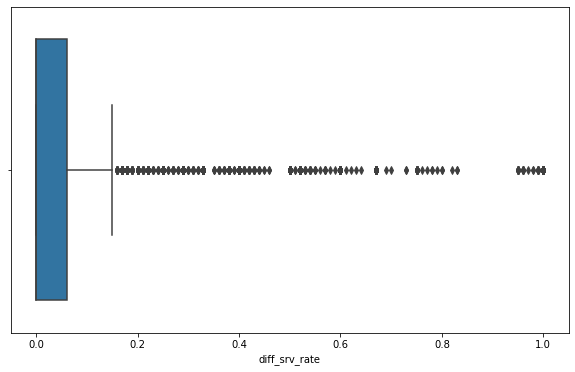

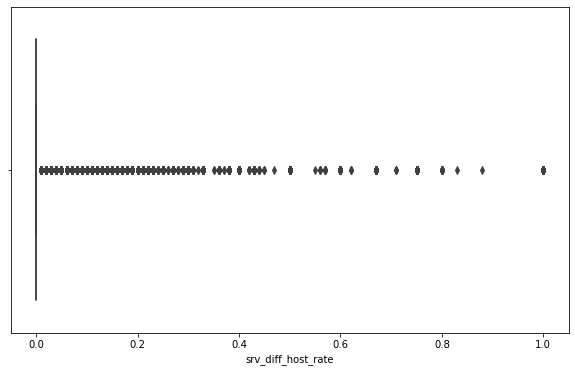

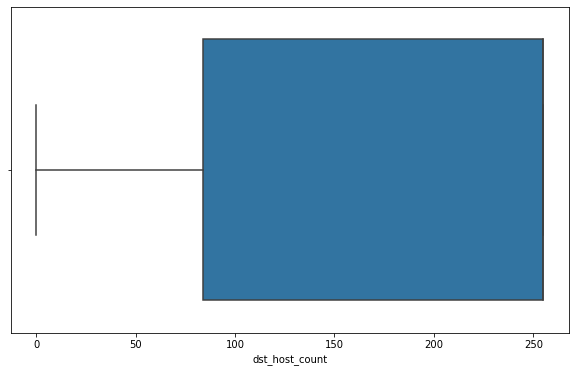

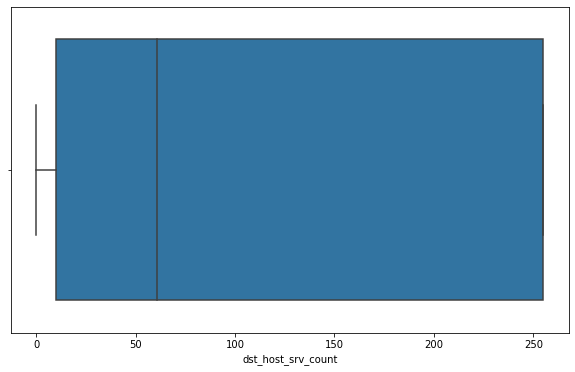

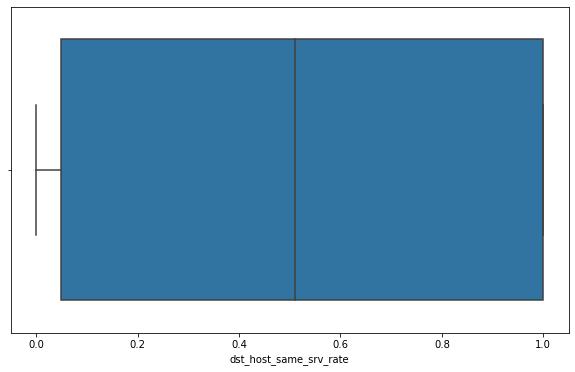

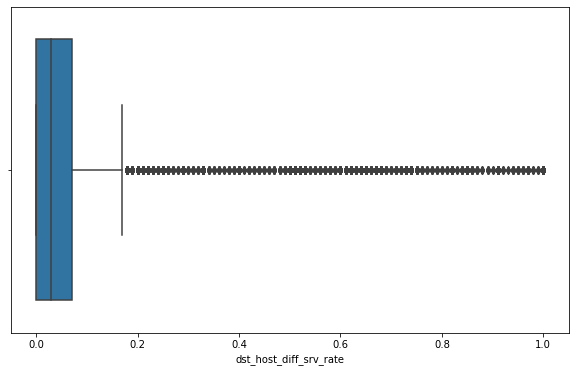

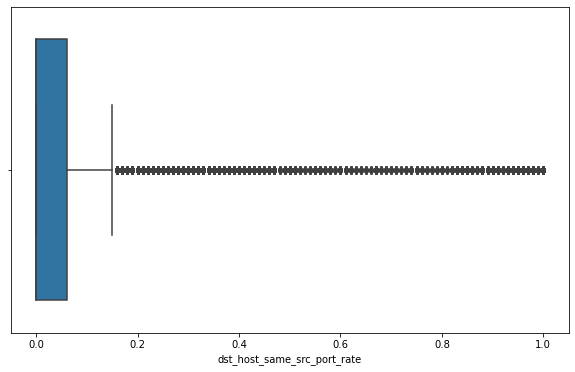

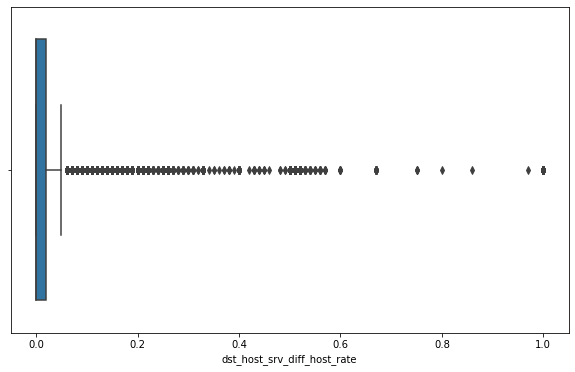

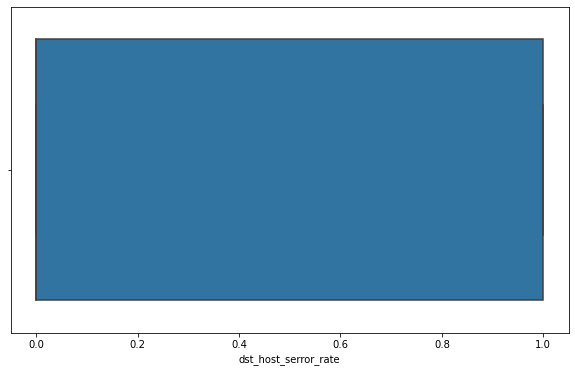

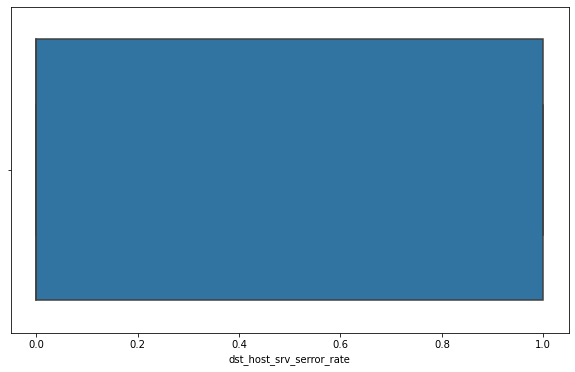

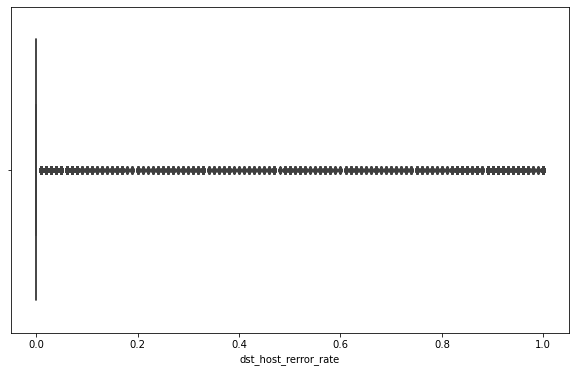

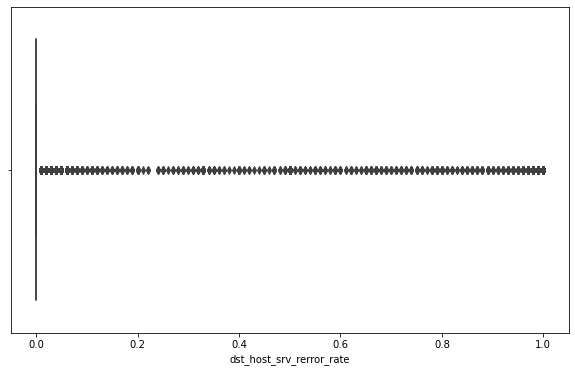

In [258]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=df)
    plt.show()

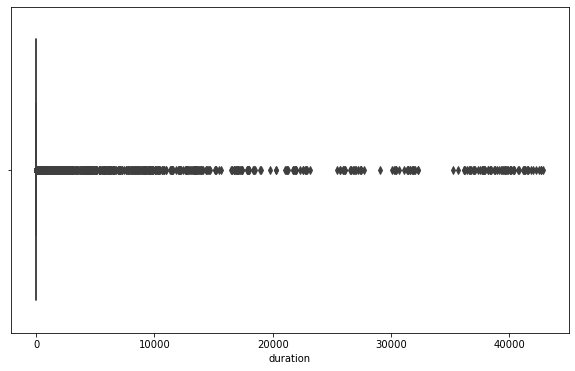

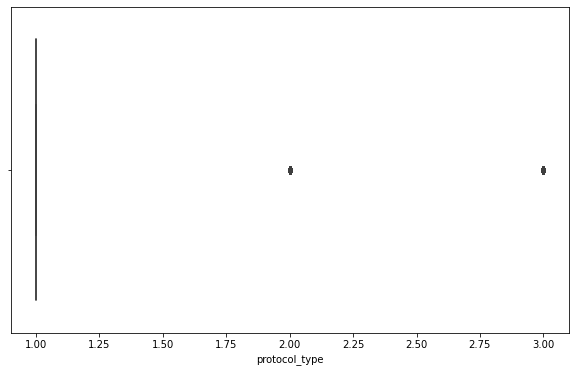

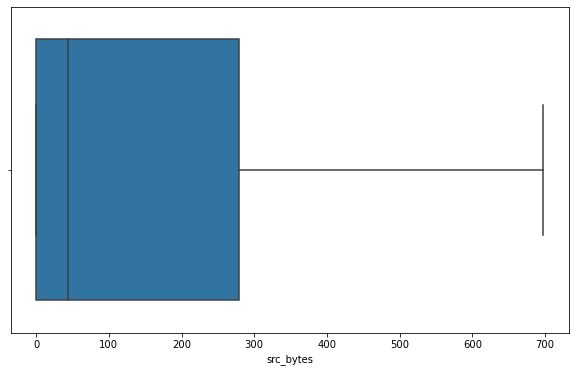

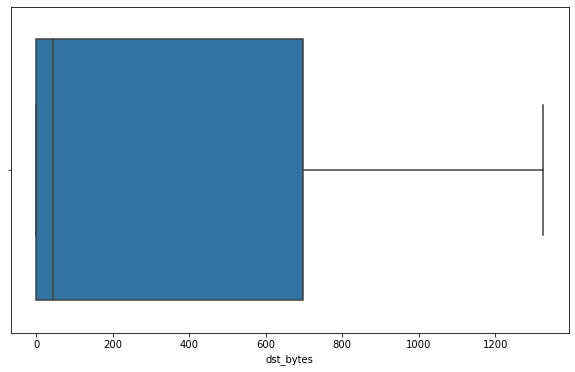

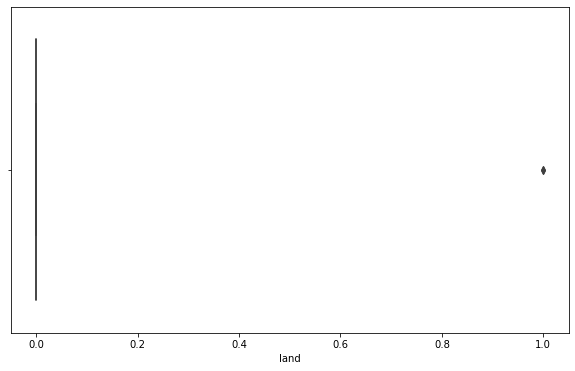

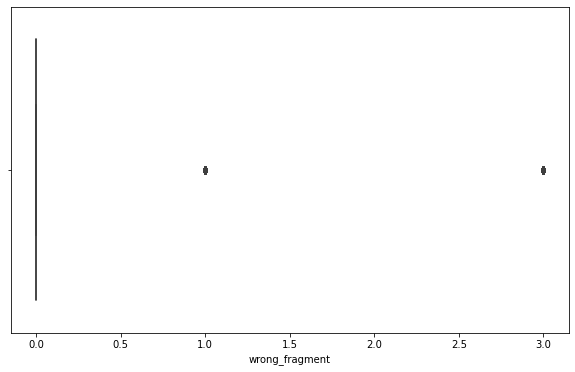

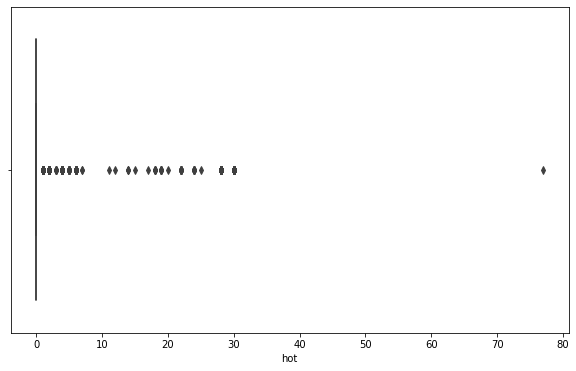

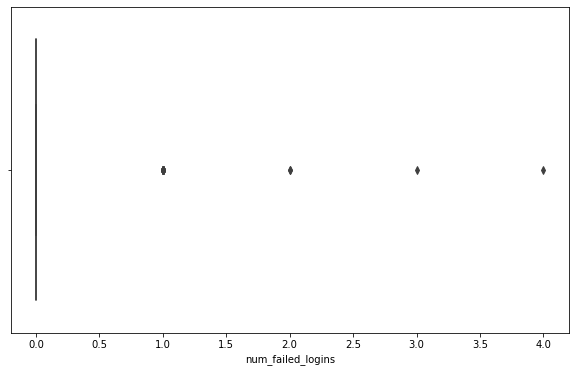

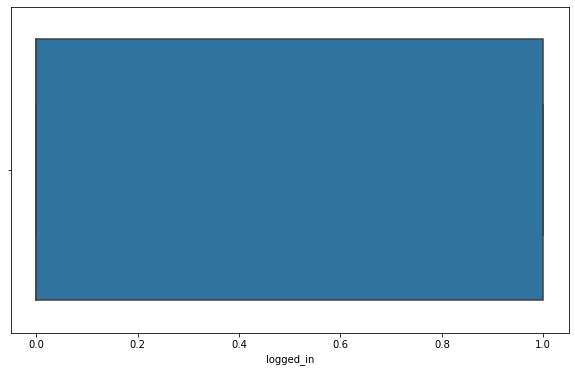

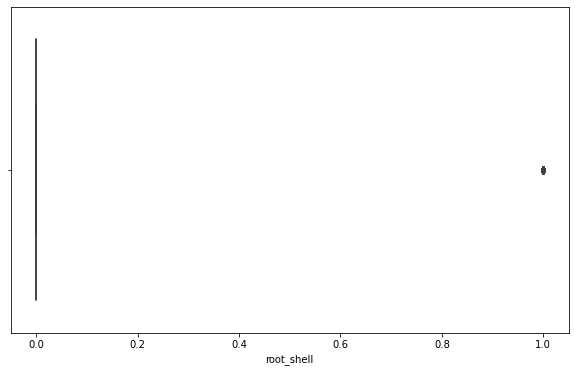

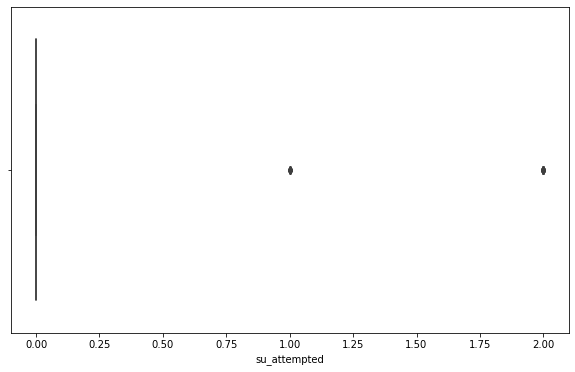

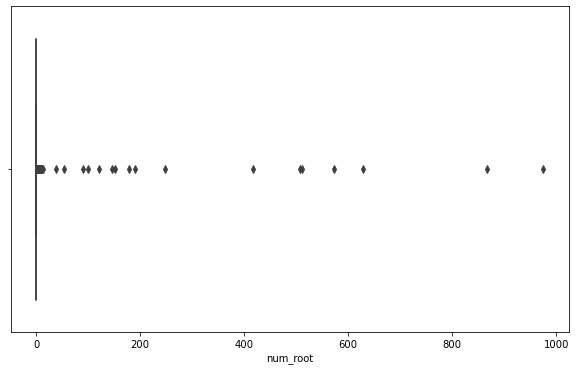

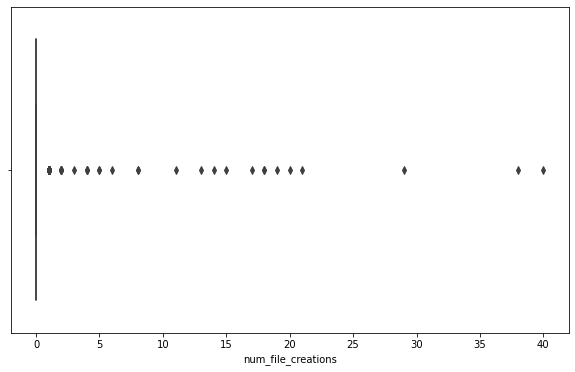

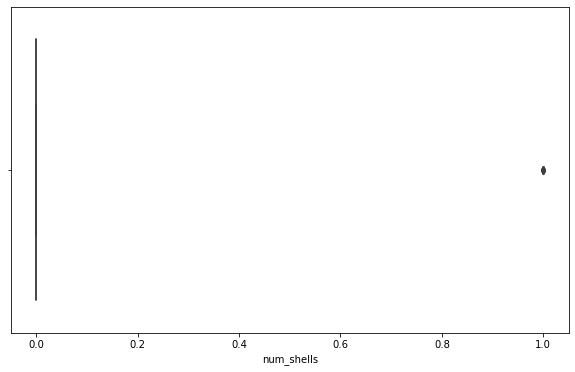

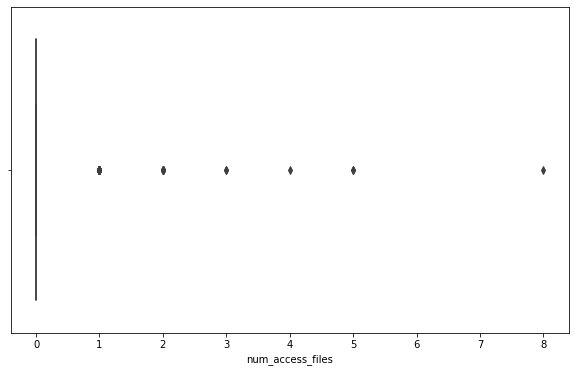

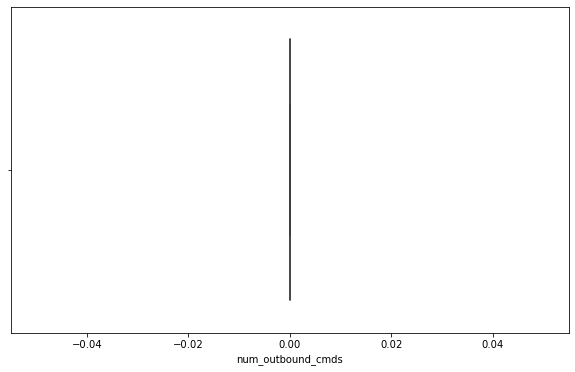

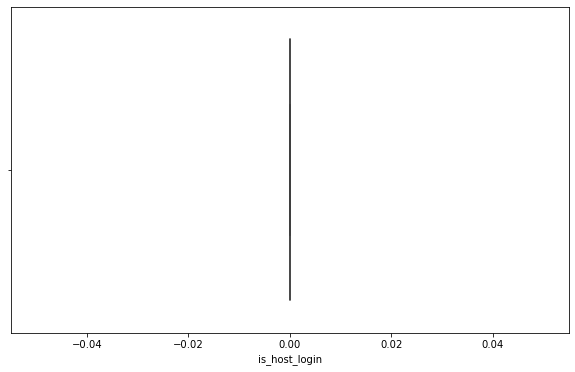

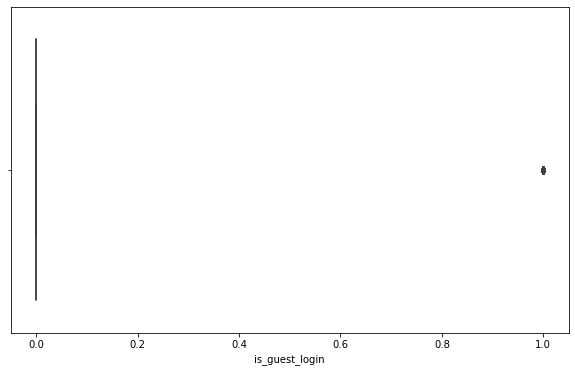

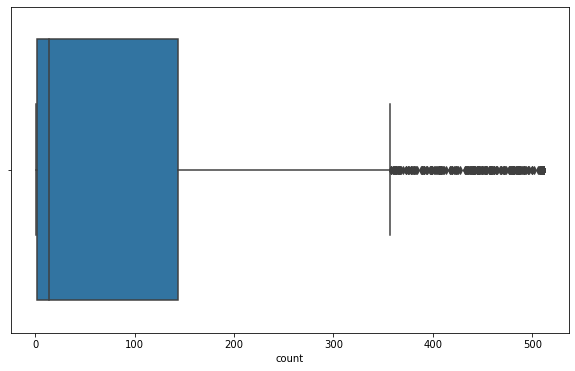

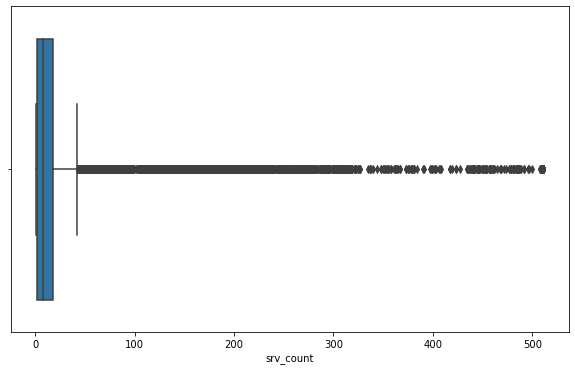

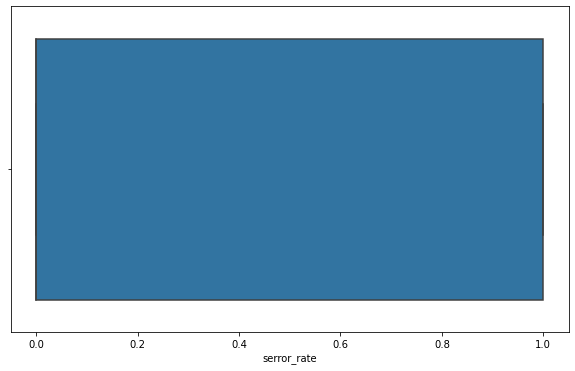

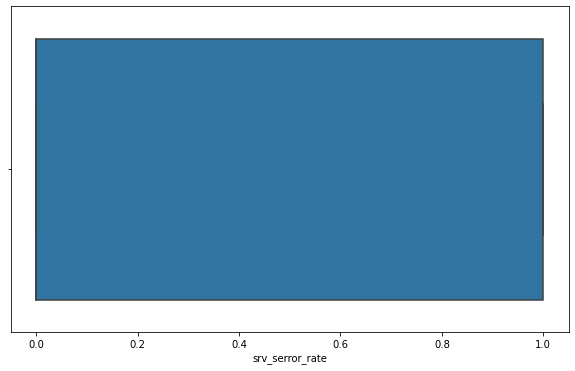

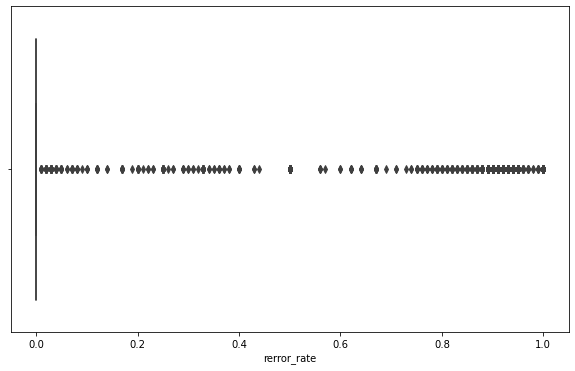

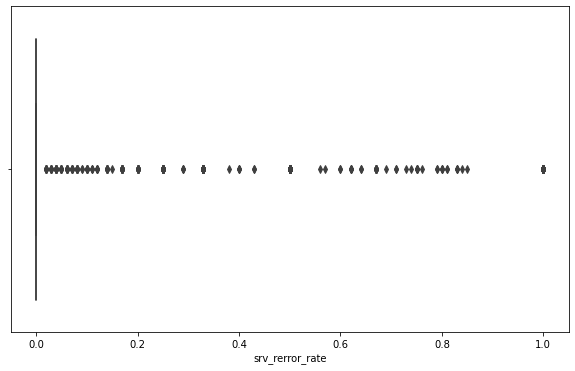

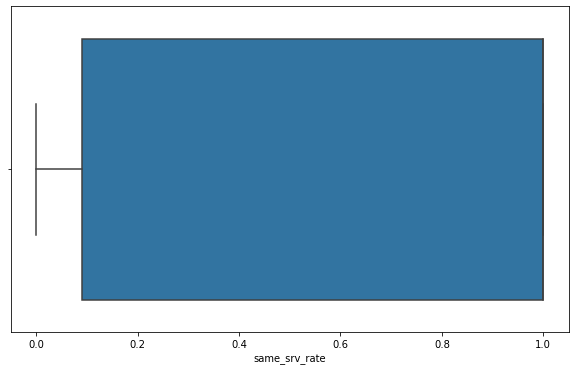

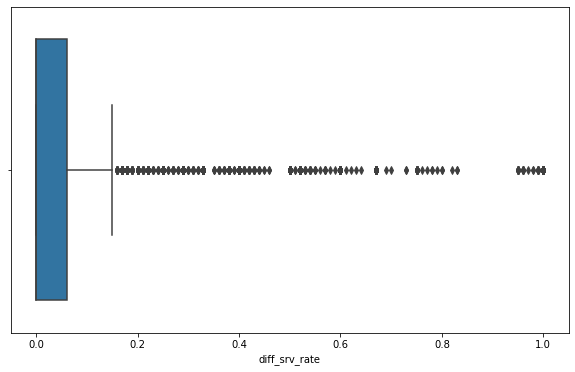

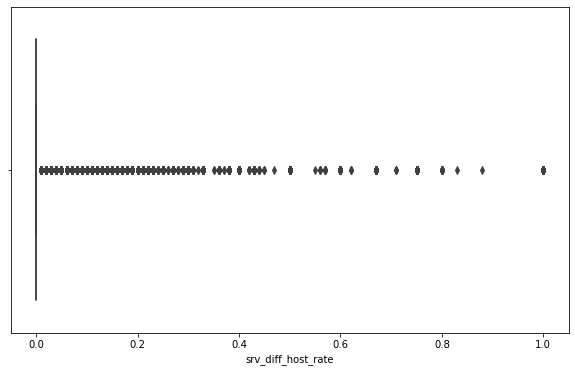

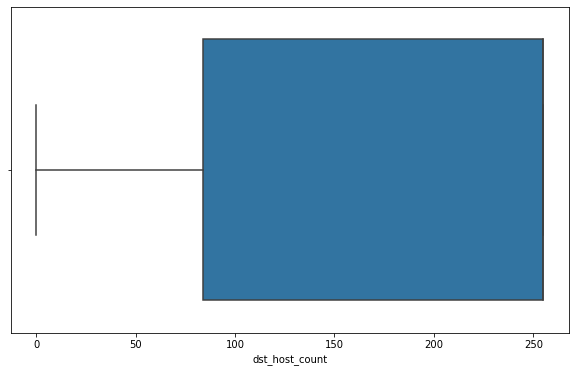

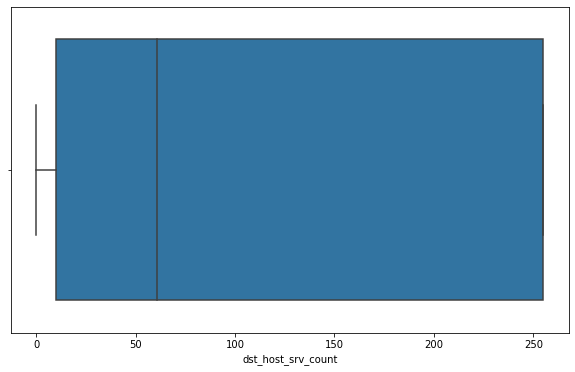

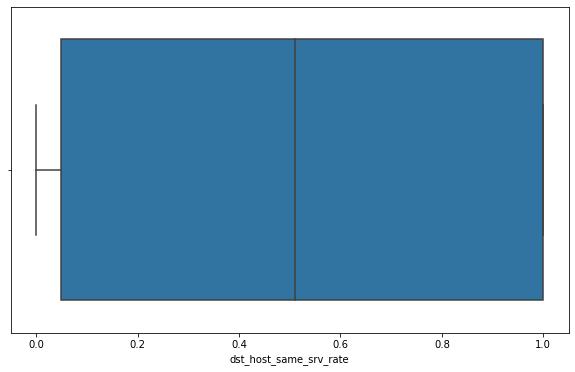

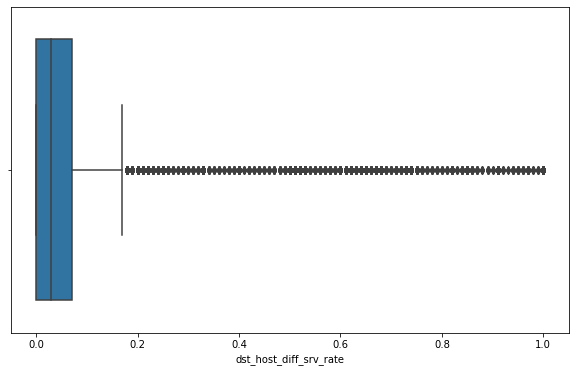

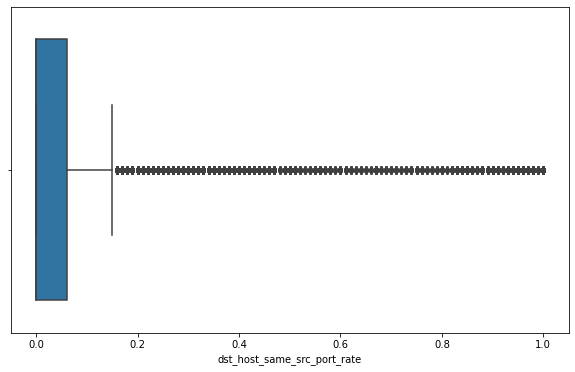

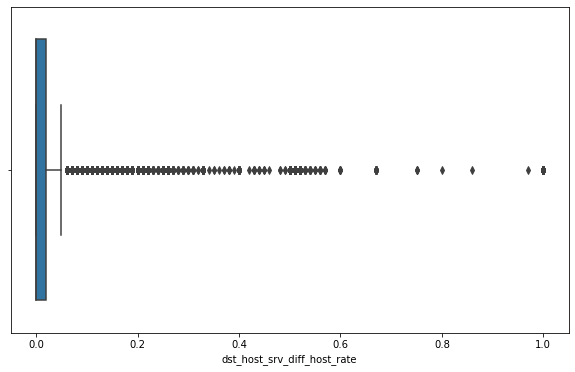

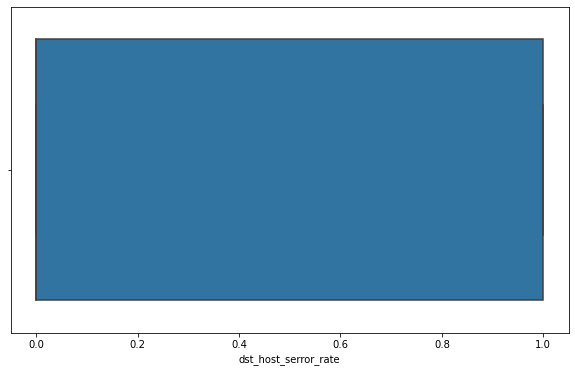

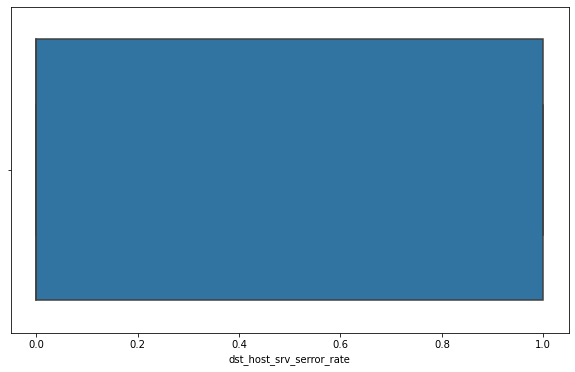

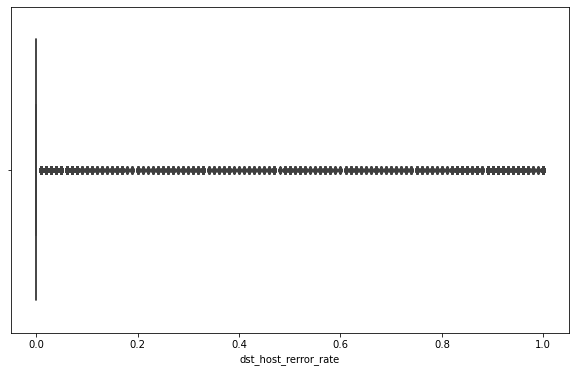

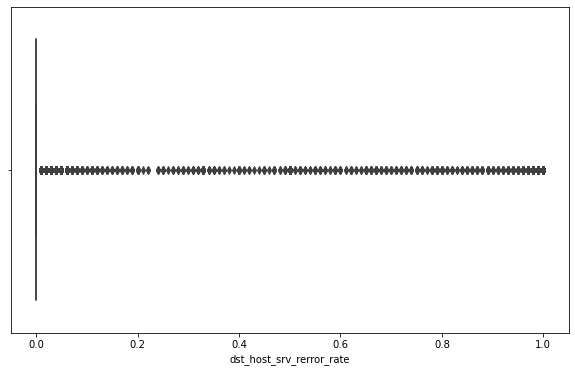

In [259]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=df)
    plt.show()

In [260]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,SF,491.0,491.000,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,SF,146.0,146.000,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,S0,0.0,0.000,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,http,SF,232.0,1325.625,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,SF,199.0,199.000,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,exec,RSTO,0.0,0.000,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,1,ftp_data,SF,334.0,334.000,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,1,private,REJ,0.0,0.000,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,1,nnsp,S0,0.0,0.000,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [345]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int32  
 3   flag                         25192 non-null  int32  
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [346]:
print(df.describe())

           duration  protocol_type  service          flag     src_bytes  \
count  25192.000000   25192.000000  25192.0  25192.000000  25192.000000   
mean     305.054104       1.250913      0.0      0.617061    171.689644   
std     2686.555640       0.565119      0.0      0.987291    225.629906   
min        0.000000       1.000000      0.0      0.000000      0.000000   
25%        0.000000       1.000000      0.0      0.000000      0.000000   
50%        0.000000       1.000000      0.0      0.000000     44.000000   
75%        0.000000       1.000000      0.0      1.000000    279.000000   
max    42862.000000       3.000000      0.0      8.000000    697.500000   

          dst_bytes          land  wrong_fragment       urgent           hot  \
count  25192.000000  25192.000000    25192.000000  25192.00000  25192.000000   
mean     362.643791      0.000079        0.023738      0.00004      0.198039   
std      505.607576      0.008910        0.260221      0.00630      2.154202   
min 

### Data Preprocessing

In [40]:
x= df.drop('class', axis=1)
y = df['class']

### Split the data into training and testing sets

In [41]:
x = df.drop('class', axis=1)

In [42]:
y = df['class']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
x = df.drop('class', axis = 1)
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [65]:
variance_inflation_factor(x.values, 1)

35.250081943938284

### Logistic classifer

### Split Data into Training and Testing Sets

In [69]:
X = df.drop('class', axis=1)  
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [100]:
clf_log = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [102]:
y_pred =model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9976185751141099
Confusion Matrix:
[[2670    4]
 [   8 2357]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



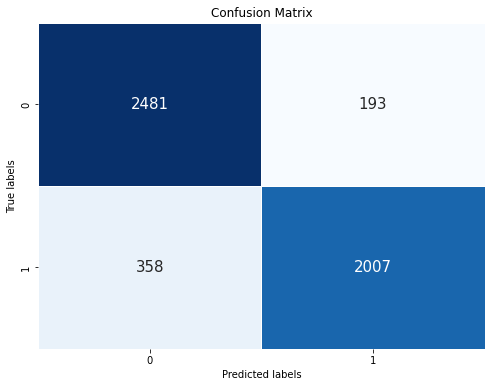

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 15}, linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### KNN CLASSIFIER

In [74]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier



### Model Building

In [75]:
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluation

In [76]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9894820400873189
Confusion Matrix:
[[2649   25]
 [  28 2337]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2674
           1       0.99      0.99      0.99      2365

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



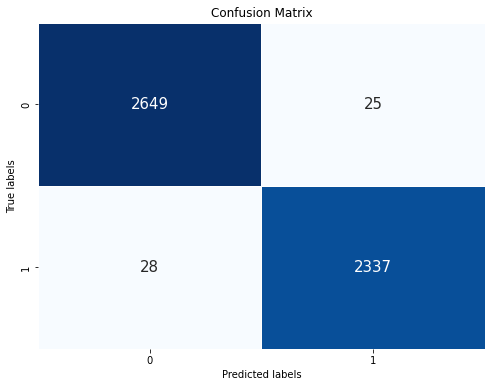

In [77]:
# Example: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 15}, linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Decision Tree Classifier 

In [78]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [79]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9954356023020441
Confusion Matrix:
[[2660   14]
 [   9 2356]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2674
           1       0.99      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



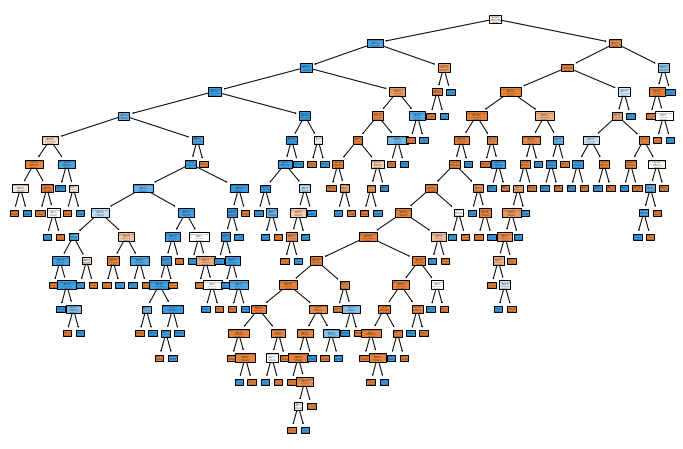

In [81]:


plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True)
plt.savefig('decision_tree.png') 


### Random Forest classifier

### Model Training

In [82]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest with 100 trees
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluation

In [83]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9976185751141099
Confusion Matrix:
[[2670    4]
 [   8 2357]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



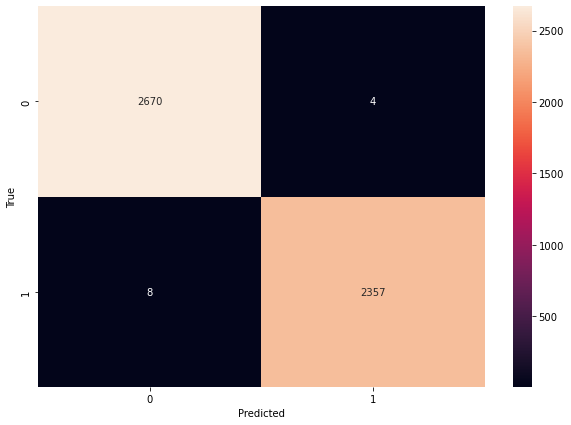

In [104]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

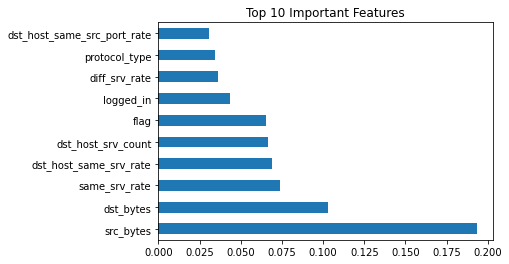

In [84]:
# Feature importance plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [95]:
x_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
741,0,1,private,S0,0,0,0,0,0,0,...,255,1,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
411,0,1,exec,RSTO,0,0,0,0,0,0,...,255,4,0.02,0.06,0.00,0.00,0.0,0.0,1.0,1.0
17841,0,1,auth,REJ,0,0,0,0,0,0,...,255,14,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0
20962,0,3,eco_i,SF,8,0,0,0,0,0,...,2,152,1.00,0.00,1.00,0.50,0.0,0.0,0.0,0.0
17790,0,1,private,S0,0,0,0,0,0,0,...,94,9,0.10,0.12,0.01,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0,2,domain_u,SF,46,71,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
5390,1,1,smtp,SF,1601,326,0,0,0,0,...,92,52,0.57,0.05,0.01,0.00,0.0,0.0,0.0,0.0
860,0,1,http,REJ,0,0,0,0,0,0,...,255,6,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0
15795,0,1,http,SF,309,4281,0,0,0,0,...,21,255,1.00,0.00,0.05,0.05,0.0,0.0,0.0,0.0


In [94]:
y_train

2199     1
15288    1
4139     0
3505     1
19281    1
        ..
21575    0
5390     0
860      1
15795    0
23654    1
Name: class, Length: 20153, dtype: int32